## Rayleigh-Jeans law vs. blackbody

### Here are two ways to write the Rayleigh-Jeans law, which is the long-wavelength approximation to the blackbody:

### $B_{\lambda}(T) = \frac{2 c k_b T}{\lambda^4}$     units: J / (s m$^2$ m) = J / (s m$^3$)
### $B_{\nu}(T) = \frac{2 k_b \nu^2 T}{c^2}$     units: J / (s m$^2$ Hz) = J / m$^2$

Boltzmann's constant: $k_b = 1.38 \times 10^{-23}$ J/K

### Here's the actual blackbody law:

### $\mathcal{I}(\lambda, T) = B_{\lambda}(T) = \frac{2 \pi c^2 h}{\lambda^5} \frac{1}{e^{hc/\lambda k T} - 1}$     units: J / (s m$^2$ m) = J / (s m$^3$)
### $\mathcal{I}(\nu, T) = B_{\nu}(T) = \frac{2 h \nu^3}{c^2} \frac{1}{e^{h \nu / kT} - 1}$     units: J / (s m$^2$ Hz) = J / m$^2$

Planck's constant: $h = 6.626 \times 10^{−34}$ J/Hz = J $\cdot$ s

Although your book uses $\mathcal{I}$ for intensity, it's common for physicists and astronomers to use $B$ to stand for blackbody

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Make readable plots
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", "font.sans-serif":"Arial"})

In [2]:
RayleighJeans_wavelength = lambda wave, T: 2 * constants.c * constants.k * T / wave**4
RayleighJeans_frequency = lambda freq, T: 2 * constants.k * freq**2 * T / constants.c**2

def blackbody(lam, T):
    nu = constants.c / lam
    return (2*np.pi/constants.c**2) * constants.h*nu**3 / (np.exp(constants.h*nu/(constants.k*T))-1)
    
"""These functions are built for input wavelengths in METERS"""

'These functions are built for input wavelengths in METERS'

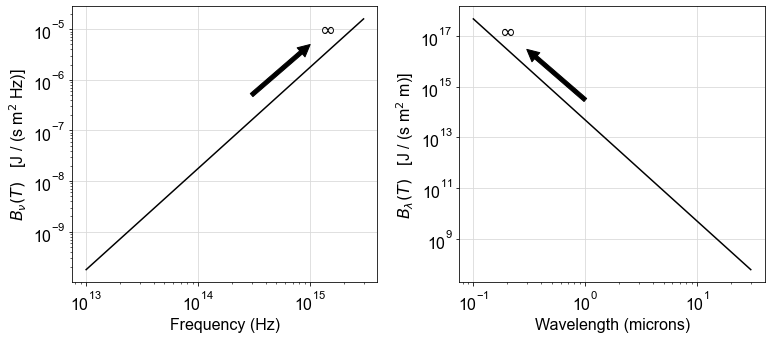

In [3]:
"""Ultraviolet catastrophe demo"""
micron_to_meter = 1e-6
waves = np.linspace(0.1, 30, num=301, endpoint=True) * micron_to_meter # Covers 0.1-10 microns = 100-10000 nm
freqs = constants.c / waves

T_demo = 5800 # Kelvins

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))

ax1.loglog(freqs, RayleighJeans_frequency(freqs, T_demo), color='k')
ax1.annotate('', xy=(1e15, 5e-6), xytext=(3e14, 5e-7), 
            arrowprops=dict(facecolor='black', shrink=0.)) # Draw arrow
ax1.text(1.2e15, 8e-6, r"$\infty$", fontsize='large')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel(r"$B_{\nu}(T)$   [J / (s m$^2$ Hz)]")
ax1.grid(color='0.85')

ax2.loglog(waves / micron_to_meter, RayleighJeans_wavelength(waves, T_demo), color='k')
ax2.annotate('', xy=(0.3, 3e16), xytext=(1, 3e14), 
            arrowprops=dict(facecolor='black', shrink=0.)) # Draw arrow
ax2.text(0.17, 1e17, r"$\infty$", fontsize='large')
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel(r"$B_{\lambda}(T)$   [J / (s m$^2$ m)]")
ax2.grid(color='0.85')

plt.tight_layout()

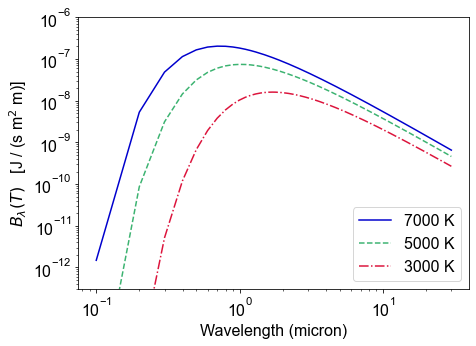

In [4]:
"""True blackbody"""

colors = ['mediumblue', 'mediumseagreen', 'crimson']
lines = ['-', '--', '-.']
temps = [7000, 5000, 3000]

plt.figure(figsize=(7,5))
for i, t in enumerate(temps):
    plt.loglog(waves/micron_to_meter, blackbody(waves, t), color=colors[i], ls=lines[i], label=f"{t}"+' K')
plt.xlabel('Wavelength (micron)')
plt.ylabel(r"$B_{\lambda}(T)$   [J / (s m$^2$ m)]")
plt.ylim(3e-13,1e-6)
plt.legend(loc='best')